#### Computational Physics - Fall 2020
#### Shalma Wegsman

## Homework #8

### Problem 1 - Asymmetric Quantum Well

Exercise 6.9

(A) The Hamiltonian acts on a wave function as follows:

$$ H = -\frac{\hbar ^2}{2 M} \frac{d^2}{dx^2} + V(x)$$

$$ H \psi(x) = \bigg[-\frac{\hbar ^2}{2 M} \frac{d^2}{dx^2} + V(x)\bigg] \sum_{n=1}^{\infty} \psi_n \sin\frac{\pi n x}{L} = E \sum_{n=1}^{\infty} \psi_n \sin\frac{\pi n x}{L}$$

Multimplying by $\sin(\pi m x/L)$ on both sides and then integrating from 0 to L, we get:

$$ \sum_{n=1}^{\infty} \psi_n \int_0^L dx \sin(\pi m x/L) \bigg[-\frac{\hbar ^2}{2 M} \frac{d^2}{dx^2} + V(x)\bigg] \sin(\pi n x/L) = \sum_{n=1}^{\infty} \psi_n E \int_0^L \sin(\pi m x/L) \sin(\pi n x/L) dx$$

if m=n:
$$ = \sum_{n=1}^\infty \psi_n E L/2 $$

otherwise, this equals 0. So we have

$$ \sum_{n=1}^\infty \int_0^L \sin(\pi m x/L) H \sin(\pi n x/L) dx = L E \psi_m /2$$

which is the relation in the textbook. 


(B)

$$ H_{mn} = \frac{2}{L} \int_0^L \sin\frac{\pi m x}{L} \bigg[-\frac{\hbar ^2}{2 M} \frac{d^2}{dx^2} + \frac{a x}{L} \bigg] \sin\frac{\pi n x}{L} dx$$

$$ = \frac{2}{L} \frac{\hbar^2 \pi^2 n^2}{2 M L^2} \int_0^L \sin\frac{\pi m x}{L}\sin\frac{\pi n x}{L} dx + \frac{2}{L} \frac{a}{L} \int_0^L x \sin\frac{\pi m x}{L}\sin\frac{\pi n x}{L} dx  $$

If m = n:

$$ H_{mn} = \frac{\hbar^2 \pi^2 n^2}{2 M L^2} + \frac{a}{2}$$

If m and n are not equal but are both either even or odd:

$$ H_{mn} = 0 $$

And otherwise:

$$ H_{mn} = -\frac{8 a m n}{\pi^2 (m^2 -n^2)^2} $$

Since all the arguments are real, H_mn is clearly real. And H_mn = H_nm, so it's also symmetric.

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

In [112]:
def Hmn(m,n):
    L = 5e-10 #m
    a = 1.60218e-18 #J
    M = 9.1094e-31 #kg,electron mass
    hbar = 1.054571817e-34 #J s
    if m==n:
        H = ((hbar*np.pi*n)**2 / (2.*M*L**2)) + (a/2)
    elif (n % 2 == 0 and m % 2 == 0) or (n % 2 == 1 and m % 2 == 1):
        H = 0
    else:
        H = - 8.*a*m*n /(np.pi**2 * (m**2 - n**2)**2)
    return(H)

In [113]:
Hmn(4,3)

-3.180436388729745e-19

(C)

In [114]:
H10 = []
for i in range(1,11):
    Hm = []
    for j in range(1,11):
        H = Hmn(i,j)
        Hm.append(H)
    H10.append(Hm)

H10 = np.asarray(H10)
print(H10)

[[ 1.04207626e-18 -2.88595154e-19  0.00000000e+00 -2.30876123e-20
   0.00000000e+00 -6.36087278e-21  0.00000000e+00 -2.61764312e-21
   0.00000000e+00 -1.32504662e-21]
 [-2.88595154e-19  1.76503506e-18 -3.11682766e-19  0.00000000e+00
  -2.94484851e-20  0.00000000e+00 -8.97851590e-21  0.00000000e+00
  -3.94268974e-21  0.00000000e+00]
 [ 0.00000000e+00 -3.11682766e-19  2.96996638e-18 -3.18043639e-19
   0.00000000e+00 -3.20661282e-20  0.00000000e+00 -1.03035625e-20
   0.00000000e+00 -4.70478756e-21]
 [-2.30876123e-20  0.00000000e+00 -3.18043639e-19  4.65687023e-18
  -3.20661282e-19  0.00000000e+00 -3.33911748e-20  0.00000000e+00
  -1.10656603e-20  0.00000000e+00]
 [ 0.00000000e+00 -2.94484851e-20  0.00000000e+00 -3.20661282e-19
   6.82574662e-18 -3.21986329e-19  0.00000000e+00 -3.41532726e-20
   0.00000000e+00 -1.15438062e-20]
 [-6.36087278e-21  0.00000000e+00 -3.20661282e-20  0.00000000e+00
  -3.21986329e-19  9.47659553e-18 -3.22748426e-19  0.00000000e+00
  -3.46314185e-20  0.00000000e+00

In [115]:
#To calculate the eigenvalues of H:
D = linalg.eigvals(H10)*6.242e+18
print(np.sort(D))

[  5.83684011+0.j  11.18197275+0.j  18.66434651+0.j  29.14645797+0.j
  42.65837336+0.j  59.1898268 +0.j  78.73543134+0.j 101.29328871+0.j
 126.8611557 +0.j 155.56730609+0.j]


(D)

In [116]:
H100 = []
for i in range(1,101):
    Hm = []
    for j in range(1,101):
        H = Hmn(i,j)
        Hm.append(H)
    H100.append(Hm)

H100 = np.asarray(H100)

In [117]:
D = linalg.eigvals(H10)*6.242e+18
print(np.sort(D)[0:11])

[  5.83684011+0.j  11.18197275+0.j  18.66434651+0.j  29.14645797+0.j
  42.65837336+0.j  59.1898268 +0.j  78.73543134+0.j 101.29328871+0.j
 126.8611557 +0.j 155.56730609+0.j]


Comparing with the answer for part (c), we see that we get the same results for a 10x10 array as with a 100x100 array. This suggests that this calculation is very accurate, even with only a 10d array.

(E)

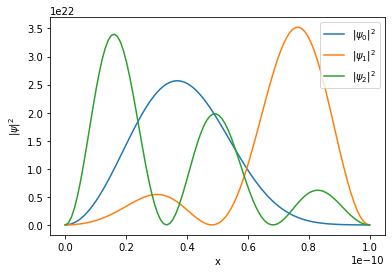

In [133]:
E, psi = linalg.eigh(H100)
isort = np.argsort(E)
E=E[isort]
psi=psi[:,isort]

def psi_n(n, x):
    psi0 = 0
    for m in range(100):
        psi0 += np.sqrt(2/L)*psi[n][m]*np.sin(np.pi*(m+1)*x/L)
    return(psi0)

def psi_0(x):
    return(psi_n(0, x))

def psi_1(x):
    return(psi_n(1, x))

def psi_2(x):
    return(psi_n(2, x))

h = L/100
norm = np.sum(psi[:,0]**2)*h
x = np.linspace(0, L, 100)
x_sq = [i**2 for i in x]
psi0_sq = [psi_0(i)**2/norm for i in x ]
psi1_sq = [psi_1(i)**2/norm for i in x ]
psi2_sq = [psi_2(i)**2/norm for i in x ]

plt.plot(x, psi0_sq, label = '$|\psi_0|^2$')
plt.plot(x, psi1_sq,label = '$|\psi_1|^2$')
plt.plot(x, psi2_sq,label = '$|\psi_2|^2$')
plt.xlabel('x')
plt.ylabel('$|\psi|^2$')
plt.legend()

### Problem 2 - Particle in a Box

(A)

We have the time-dependent Schrodinger Equation:

$$ i \hbar \frac{\partial \Psi}{\partial t} = - \frac{\hbar^2}{2 m} \frac{\partial^2 \Psi}{\partial x^2} + V(x) \Psi $$

Let's use seperation of variables to define:

$$ \Psi(x,t) = \psi(x) \phi(t) $$

Plugging this into Schrodinger's equation we get:

$$ 0 = \frac{\hbar^2}{2 m} \phi(t) \psi^{''}(x) + i \hbar \psi(x) \dot \phi(t) - V(x) \phi(t) \psi(x)$$

Dividing by $\psi \phi$:

$$ 0 = \frac{\hbar^2}{2 m} \frac{\psi^{''}(x)}{\psi(x)} - V(x) + i\hbar \frac{\dot \phi(t)}{\phi(t)}$$

$$ \Rightarrow -\frac{\hbar^2}{2 m} \frac{\psi^{''}(x)}{\psi(x)} + V(x) = i\hbar \frac{\dot \phi(t)}{\phi(t)} = E$$

So from the time dependent side we get

$$ i\hbar \frac{d \phi(t)}{ d t} = E \phi(t) $$

$$ \Rightarrow \phi(t) = A e^{-i E t / \hbar} $$

and from the spatial side we have

$$ -\frac{\hbar^2}{2 m} \frac{d^2 \psi(x)}{dx^2} + V(x)\psi(x) = E \psi(x)  $$

We can solve this with the typical procedure for a time-independent particle in a box. We can write the general solution as $\psi(x) = A\cos(k x) + B\sin(kx)$, and we know that it must satisfy the boundary conditions $\psi(x=-L/2) = \psi(x=L/2) = 0$. From these boundary conditions we get

$$ \psi(x=-L/2) = A\cos(k L/2) - B\sin(k L/2) = 0$$
$$ \Rightarrow A\cos(k L/2) = B\sin(k L/2) $$
$$ \Rightarrow A = B \tan(k L/2) $$
and
$$ \psi(x=L/2) = A\cos(k L/2) + B\sin(k L/2) = 0$$
$$ \Rightarrow A\cos(k L/2) = - B\sin(k L/2) $$
$$ \Rightarrow A = - B \tan(k L/2) $$

so we need that $\tan(k L/2) = 0 \Rightarrow k L/2 = n \pi \Rightarrow k = 2 n \pi/L$. Since $k = \sqrt{2 m E}$, we have the energy eigenvalues

$$ E_n = \frac{k^2}{2m} = \frac{n^2 \hbar^2 \pi^2}{2 m L^2}$$

Let's take two cases, n odd and n even. Then we find that the solutions are

$$ \psi_n(x) = N \cos(\frac{n \pi x}{L}) $$ for odd n and
$$ \psi_n(x) = N \sin(\frac{n \pi x}{L}) $$ for even n

with eigenvalues $E_n = \frac{n^2 \hbar^2 \pi^2}{2 m L^2}$. Normalizing, we get that $N = \sqrt{\frac{2}{L}}$.


(B)

Now we want to solve 
$$ -\frac{\hbar^2}{2 m} \frac{d^2 \psi(x)}{dx^2} + V(x)\psi(x) = E \psi(x)  $$
using the finite difference method.

We can approximate the derivative $\frac{d^2 \psi(x)}{dx^2}$ as:

$$ \frac{d^2 \psi(x)}{dx^2} = \frac{\psi(x - h) - 2 \psi(x) + \psi(x+h)}{h^2} $$

Choosing N grid points between $x_0 = -L/2$ and $x_N = L/2$ so that the boundary conditions are $\psi(x_0) = 0$ and $\psi(x_N) = 0$. We can rewrite our equation as

$$ -\frac{\hbar^2}{2 m} \frac{\psi(x_{j-1}) + \psi(x_{j+1}) - 2 \psi(x_j)}{h^2} = E \psi(x_j)$$

since $V = 0$ on our range. This is a matrix equation:

$$-\frac{\hbar^2}{2 m} \begin{pmatrix} -2 & 1 & 0 & 0 & ... & 0 \\ 1&-2&1 & 0&...&0\\ 0&1&-2&1&...&0\\... \\0&0&0&...&1&-2 \end{pmatrix} \begin{pmatrix}\psi(x_0)\\\psi(x_1)\\\psi(x_2)\\...\\\psi(x_N) \end{pmatrix} = E\begin{pmatrix}\psi(x_0)\\\psi(x_1)\\\psi(x_2)\\...\\\psi(x_N) \end{pmatrix}  $$

In [35]:
from matplotlib import animation
from IPython.display import HTML
import cmath

In [50]:
N=199
h=1./(N+1)
c1 = -2.
c2 = 1.
M=np.zeros((N,N))
M[0,0]=c1
M[0,1]=c2
M[-1,-2]=c2
M[-1,-1]=c1
for i in np.arange(1,N-1):
    M[i,i-1]=c2
    M[i,i]=c1
    M[i,i+1]=c2
M/=h**2

print(M)

[[-80000.  40000.      0. ...      0.      0.      0.]
 [ 40000. -80000.  40000. ...      0.      0.      0.]
 [     0.  40000. -80000. ...      0.      0.      0.]
 ...
 [     0.      0.      0. ... -80000.  40000.      0.]
 [     0.      0.      0. ...  40000. -80000.  40000.]
 [     0.      0.      0. ...      0.  40000. -80000.]]


In [51]:
E,Evec=linalg.eig(M)
isort = np.argsort(E)
E=E[isort]
Evec=Evec[:,isort]
print(E[:30])

[-159990.13059853+0.j -159960.52482926+0.j -159911.18999696+0.j
 -159842.13827426+0.j -159753.38669865+0.j -159644.95716825+0.j
 -159516.87643641+0.j -159369.17610516+0.j -159201.89261732+0.j
 -159015.06724761+0.j -158808.74609238+0.j -158582.9800583 +0.j
 -158337.82484974+0.j -158073.3409551 +0.j -157789.59363181+0.j
 -157486.65289029+0.j -157164.59347662+0.j -156823.49485416+0.j
 -156463.44118387+0.j -156084.52130361+0.j -155686.8287062 +0.j
 -155270.46151634+0.j -154835.52246639+0.j -154382.11887106+0.j
 -153910.3626009 +0.j -153420.37005472+0.j -152912.26213084+0.j
 -152386.16419728+0.j -151842.20606085+0.j -151280.52193507+0.j]


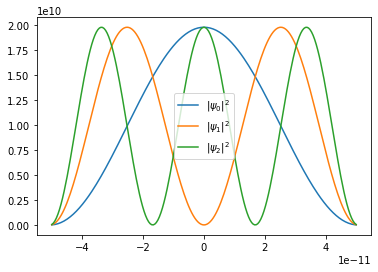

In [49]:
L = 1e-10
x =np.linspace(-L/2,L/2,N)

norm0 = np.trapz(Evec[:,0]**2,x)
norm1 = np.trapz(Evec[:,1]**2,x)
norm2 = np.trapz(Evec[:,2]**2,x)

plt.plot(x,(Evec[:,0]**2)/norm0,label='$|\psi_0|^2$')
plt.plot(x,(Evec[:,1]**2)/norm1,label='$|\psi_1|^2$')
plt.plot(x,(Evec[:,2]**2)/norm2,label='$|\psi_2|^2$')

plt.legend()

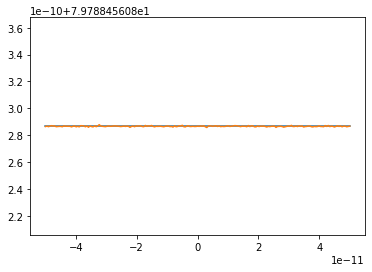

In [52]:
sigma = h
initial = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x/sigma)**2/2)
Evec_inv=linalg.inv(Evec)
ak=Evec_inv.dot(initial)
plt.plot(x,initial)
plt.plot(x,Evec.dot(ak))

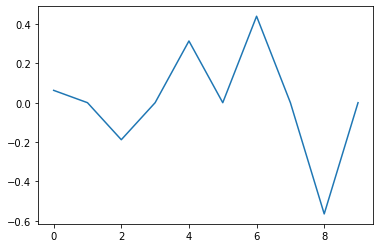

In [53]:
plt.plot(ak[:10])

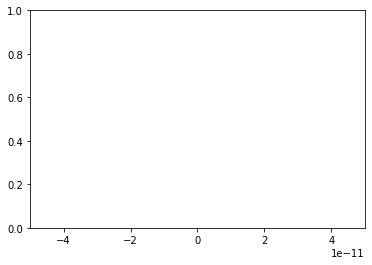

In [108]:
fig, ax = plt.subplots()

ax.set_xlim((-L/2,L/2))
ax.set_ylim((0,1))

line, = ax.plot([], [], lw=2)

nframes = 500

def init():
    line.set_data([], [])
    return (line,)

In [109]:
def frame(i):
        period =  2. * np.pi / E[0]
        t = np.float64(i) / np.float64(nframes) * period * 4
        hbar = 6.62607015e-34 #J s
        coeffs = ak * (np.cos(-E*t/hbar) + 1j*np.sin(-E*t/hbar))
        y = Evec.dot(coeffs).flatten()
        line.set_data(x, y*np.conj(y)*h**2)
        return (line,)

In [110]:
anim = animation.FuncAnimation(fig, frame, init_func=init,
                               frames=nframes, interval=40, blit=True,
                               repeat_delay=2000)

HTML(anim.to_html5_video())

C:\Users\shalm\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
